In [4]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Import data
wine_df = pd.read_csv('winemag.csv')
wine_df.head(5)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,NaN,NaN,Douro,Portugal,Quinta dos Avidagos
1,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,NaN,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
2,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,NaN,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,NaN,Michigan,US,St. Julian
3,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks
4,87,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Blackberry and raspberry aromas show a typical...,Michael Schachner,@wineschach,15.0,Ars In Vitro,Tempranillo-Merlot,Navarra,NaN,Northern Spain,Spain,Tandem


/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


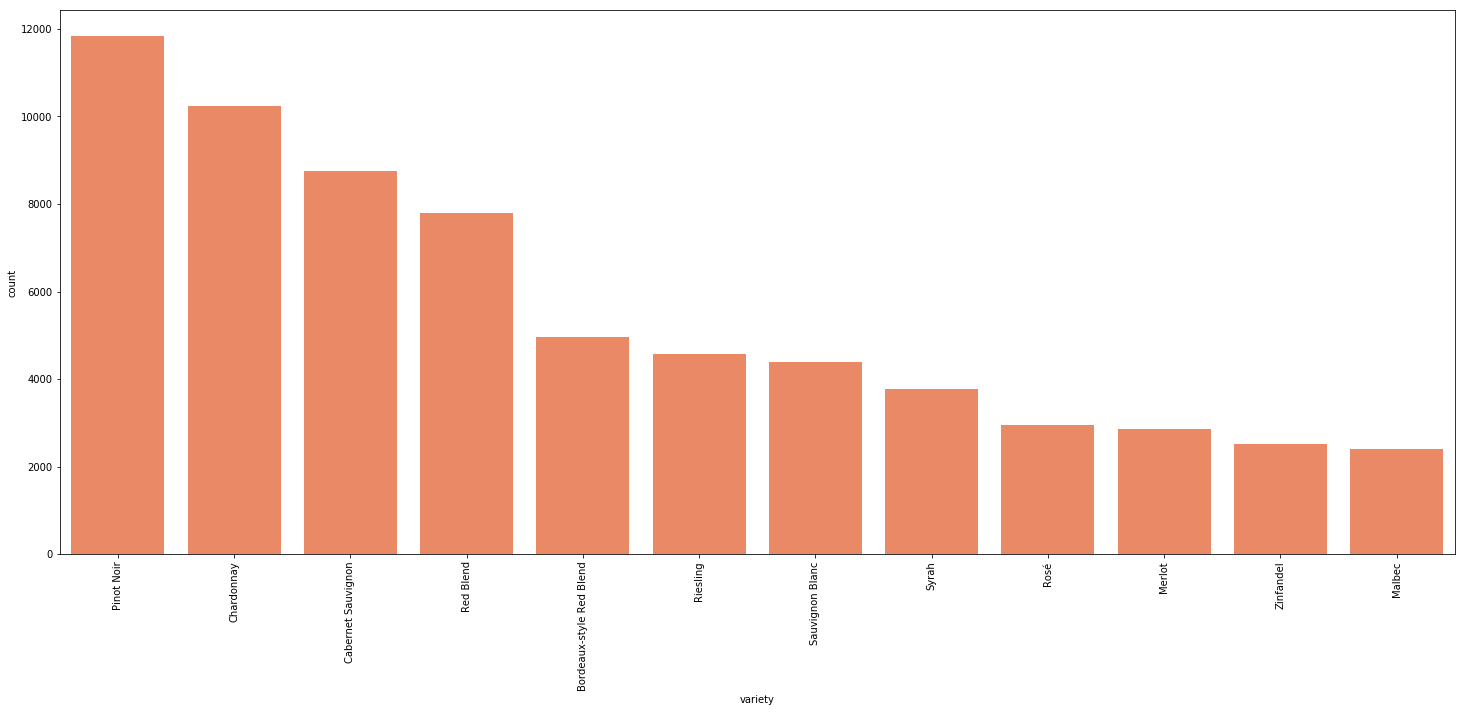

In [5]:
v_df = wine_df.groupby('variety').filter(lambda x: len(x) > 2200)
varieties = v_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = v_df['variety'], order = varieties, ax = ax, color = 'coral')
plt.xticks(rotation = 90)
plt.show()

In [16]:
filename = 'kmeansmodel1.pk'
with open(filename, 'rb') as fh:
   b = pickle.load(fh)

In [17]:
print(b)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=20,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [18]:
model = b
order_centroids= model.cluster_centers_.argsort()[:,::-1]
order_centroids

array([[ 2298, 10170, 15905, ..., 14407, 14409, 23914],
       [ 4018, 15705,  3298, ..., 14678, 23642, 23914],
       [ 2603,  8907, 13151, ..., 14012, 14013, 23914],
       ..., 
       [ 2431,  6817, 21009, ..., 14201, 14202, 23914],
       [ 2427,  4113,  8858, ..., 13242, 13241, 23914],
       [ 1352, 12033, 12180, ..., 10438, 10437,  8026]])

In [19]:
vectorizer = TfidfVectorizer(stop_words = 'english')
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [24]:
filename = 'vectorizer1.pk'
with open(filename, 'rb') as fh:
   c = pickle.load(fh)

In [25]:
true_k = 12
vectorizer = c
terms=vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d" %i),
    for ind in order_centroids[i,:12]:
        print('%s'%terms[ind]),
    print
print("\n")
print("Prediction")
Y=vectorizer.transform(["zinfandel"])
prediction=model.predict(Y)
print(prediction)

Cluster 0
berry
herbal
plum
oak
red
earthy
spicy
spice
oaky
rubbery
cassis
baked
Cluster 1
chardonnay
pineapple
buttered
toast
vanilla
oak
tropical
acidity
sweet
fruit
creamy
rich
Cluster 2
bodied
full
medium
wine
texture
fruit
cherry
ripe
oak
black
tannins
red
Cluster 3
fruit
wine
cherry
red
oak
light
raspberry
tannins
vineyard
acidity
spice
tart
Cluster 4
wine
fruits
wood
drink
tannins
ripe
aging
acidity
fruit
rich
firm
age
Cluster 5
pinot
noir
cherry
cola
silky
raspberry
dry
cherries
acidity
drink
wine
red
Cluster 6
cabernet
sauvignon
merlot
blend
franc
verdot
petit
malbec
black
syrah
cherry
fruit
Cluster 7
wine
acidity
drink
fruity
crisp
ready
attractive
fruits
red
soft
light
aftertaste
Cluster 8
black
tannins
cherry
sangiovese
opens
pepper
delivers
spice
red
berry
plum
whiff
Cluster 9
blackberry
dry
tannins
blackberries
sweet
oak
rich
wine
currants
cherries
cabernet
drink
Cluster 10
black
cherry
fruit
dark
pepper
plum
tannins
wine
blackberry
spice
chocolate
dried
Cluster 11
apple


In [26]:
v_df['cluster'] = model.labels_

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
clusters = v_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Blues')

ax2.set_ylabel('K-Clusters', fontdict = {'size': 20})
ax2.set_xlabel('Wine Varieties', fontdict = {'size': 20})

for label in ax2.get_xticklabels():
    label.set_weight("bold")
    label.set_size(20)
for label in ax2.get_yticklabels():
    label.set_weight("bold")
    label.set_size(20)
        

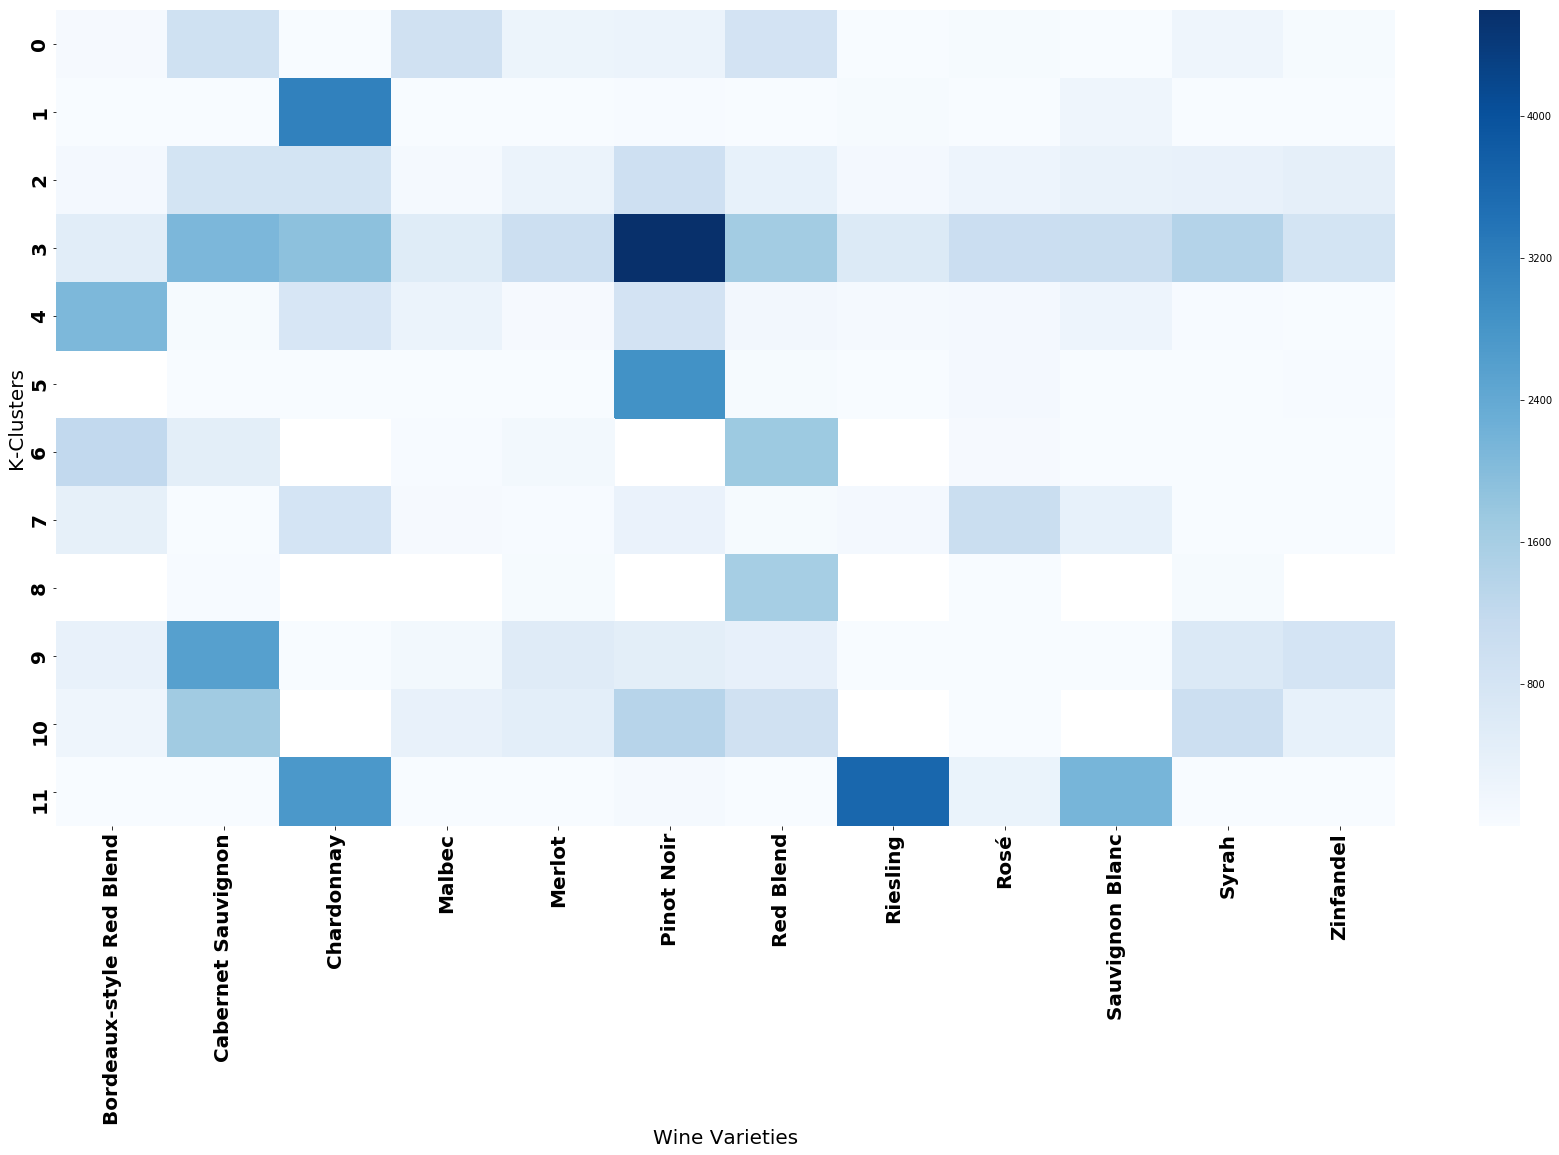

In [28]:
plt.show()